# A General Central Force

This implementation adds a central acceleration of the form $\vec{a}=Ar^\gamma\hat{r}$, where $\vec{r}$ is the vector from the central particle to the body.  Let's first create a simulation with a single planet:

In [1]:
import rebound
import reboundx

In [2]:
sim = rebound.Simulation()
sim.add(m=1.) 
sim.add(m=1.e-3, a=1., e=0.2)
ps = sim.particles

Now we add REBOUNDx and our effect as usual:

In [3]:
rebx = reboundx.Extras(sim)
cf = rebx.load_force("central_force")
rebx.add_force(cf)

We need to choose a normalization `Acentral` and power `gammacentral` for our force law (see above), which we assign to the central particle itself.  **`gammacentral` must be a float (add a dot after an integer power).**

In [4]:
ps[0].params["gammacentral"] = -1. # period needed after integer power
ps[0].params["Acentral"] = 1.e-4

We can also (instead) use the function `rebx.central_force_Acentral` to calculate the Acentral required for a particular particle (here `ps[1]`) around a primary (`ps[0]`) to have a pericenter precession rate of `pomegadot`, given a power `gammacentral`:

In [5]:
pomegadot = 1.e-3 # has dimensions of inverse time, in whatever units the simulation uses.
ps[0].params["Acentral"] = rebx.central_force_Acentral(ps[1], ps[0], pomegadot, ps[0].params["gammacentral"])

We can include the force's contribution to the total energy:

In [6]:
E0 = sim.calculate_energy() + rebx.central_force_potential()

Now we integrate, keep track of the pericenter and the relative energy error, then plot the results:

In [7]:
import numpy as np
Nout=1000
pomega, Eerr = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0,3.e4,Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    pomega[i] = ps[1].pomega
    E = sim.calculate_energy() + rebx.central_force_potential()
    Eerr[i] = abs((E-E0)/E0)

Text(0,0.5,'Energy Error')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


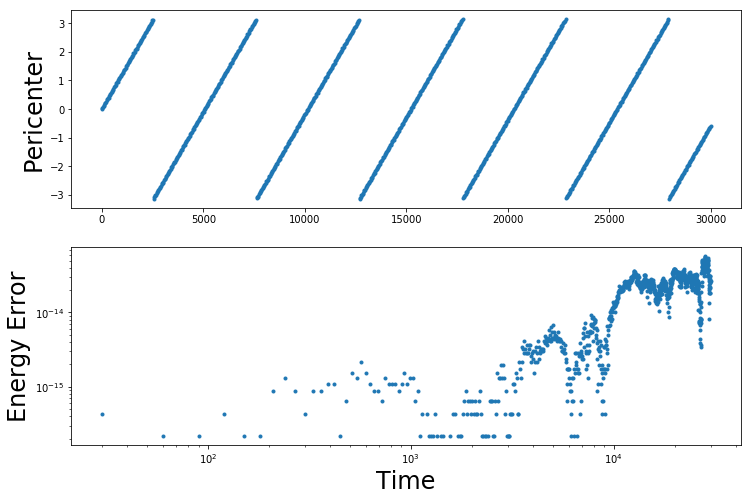

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(nrows=2, figsize=(12,8))
axarr[0].plot(times, pomega, '.')
axarr[0].set_ylabel("Pericenter", fontsize=24)
axarr[1].plot(times, Eerr, '.')
axarr[1].set_xscale('log')
axarr[1].set_yscale('log')
axarr[1].set_xlabel('Time', fontsize=24)
axarr[1].set_ylabel('Energy Error', fontsize=24)